# Ciclos

Es muy común que, al programar, necesitemos implementar alguno de los siguientes procesos:
* repetir una secuencia de instrucciones mientras cierta condición se cumpla,
* aplicar una misma secuencia de instrucciones para cada elemento de un arreglo,
* ejecutar una serie de instrucciones _recursivamente_; es decir, que una de las instrucciones de la serie sea volver a ejecutar toda la serie de instrucciones.

En la mayoría de los lenguajes de programación, estas funcionalidades están implementadas a través de **ciclos**. Dado que en los primeros dos procesos se _itera_ sobre una condición o sobre los elementos de un arreglo, respectivamente, se conocen como ciclos **iterativos**, mientras que el tercero se conoce como un ciclo **recursivo**. 

## Ciclos iterativos

### Ciclos `while` (_while loops_)

Los ciclos que ejecutan repetidamente una secuencia de instrucciones _mientras_ cierta condición se cumpla se conocen como ciclos _while_. Su sintáxis en Julia es la siguiente:

$\color{green}{\textbf{while }} \text{condition}$    # condición

$\quad \quad \text{block}$    # bloque de codigó

$\color{green}{\textbf{end}}$    # se evalua la condición, si es verdadera se ejecuta y vuelve a evaluar, si es falsa se sale del código y ejecuta lo de abajo

Al ejecutar este código:
1. Julia ejecutará la expresión $\text{condition}$.
1. Si $\text{condition}$ se evalúa a `true`, ejecutará el bloque de código $\text{block}$ y regresará al paso 1.
1. Si $\text{condition}$ se evalúa a `false`, **no** ejecutará el bloque de código $\text{block}$ **ni tampoco** volverá al paso 1, sino que seguirá ejecutando las instrucciones debajo de $\color{green}{\textbf{end}}$ (de haberlas).

Observa que, para que Julia pueda llegar al paso 3 y terminar de ejecutar el ciclo _while_, es necesario que el bloque de código $\text{block}$ **modifique (eventualmente) el valor de** $\text{condition}$; ¡de lo contrario, la serie de instrucciones en $\text{block}$ se ejecutará infinitamente! Si llegamos a pedirle a la computadora que **ejecute un proceso infinito**, deberemos reiniciar nuestro _kernel_ para poder seguir trabajando.

Un ejemplo de un ciclo _while_ bien implementado (es decir, finito) es el siguiente:

In [1]:
x = 0          # Asignamos el valor 0 a una variable 'x'.

while x <= 10  # Iniciamos un ciclo que se repetirá mientras x sea menor o igual que 10
               
    println(x) # Imprimimos el valor de 'x'. #Println imprime y crea una nueva línea
    x += 1     # ¡Aumentamos el valor de 'x' para que el ciclo termine/ le suma 1 al valor de x, esto hace que por cada ciclo el valor de x aumente por uno, hasta llegar al punto en que se obtenga un resultado false y se detenga el ciclo
               # eventualmente y no se haga un proceso infinito!
end
#Julia evaluó x<=10, como con x=0 es True la condición imprime su valor y le aumenta a su valor un uno, esto se repite sucesivamente hasta llegar a un x=10 donde imprime el valor x, aumenta su valor en 1 y como ahora x=11 se obtiene False y termina el ciclo 

0
1
2
3
4
5
6
7
8
9
10


mientras que dos ejemplos de ciclos _while_ **mal implementados** (es decir, infinitos) son los siguientes:

In [ ]:
x = 0          # Asignamos el valor 0 a una variable 'x'.

while x <= 10  # Iniciamos un ciclo que se repetirá mientras x
               # tenga un valor menor o igual a 10.
    #No estamos actualizando el valor de x, entonces siempre se va a verificar la condición infinitamente 
    println(x) # Imprimimos el valor de 'x'.
               # No modificamos el valor de 'x', ¡así que siempre valdrá 0 
end            # y el ciclo se volverá a ejecutar infinitamente!

In [ ]:
x = 0          # Asignamos el valor 0 a una variable 'x'.

while x <= 10  # Iniciamos un ciclo que se repetirá mientras x
               # tenga un valor menor o igual a 10.
    println(x) # Imprimimos el valor de 'x'.
    x -= 1     # Modificamos el valor de 'x', ¡pero no de forma que
               # eventualmente la condición no se cumpla!
end

Una aplicación muy importante de los ciclos _while_ es para repetir un cálculo numérico hasta que éste tenga la precisión que deseamos. Como de costumbre, la precisión se determina como el valor absoluto de la diferencia entre el valor que obtenemos (el resultado del cálculo) y el valor que esperamos (o bien, el valor exacto), por lo que un ejemplo de pseudocódigo que usa un ciclo while de esta manera se vería como sigue:

$\varepsilon = 0.1 \quad \quad \quad \quad \quad \quad \color{blue}{\text{# Definimos la cota mínima de precisión que queremos.}}$

$\text{p} = 3 \ \ \ \quad \quad \quad \quad \quad \quad \color{blue}{\text{# Asignamos un valor a nuestra variable.}}$

$\color{green}{\textbf{while }} \text{abs}(\pi-\text{p}) > \varepsilon \quad \color{blue}{\text{# Mientras no se tenga la precisión deseada...}}$

$\quad \quad \text{block} \ \ \ \quad \quad \quad \quad \color{blue}{\text{# Cálculos que deriven en una reasignación del valor de}}$

$\ \ \ \quad \quad \quad \quad \quad \quad \quad \quad \color{blue}{\text{# la variable p y lo acerquen al valor de } \pi}.$

$\color{green}{\textbf{end}}$

Usaremos los ciclos _while_ de esta forma frecuentemente cuando veamos métodos numéricos.

**Ejercicio** Implementa un código que aproxime la épsilon de máquina para `Float64` **sin utilizar la función `eps`**.

In [1]:
eps() 

2.220446049250313e-16

In [2]:
e=1 #definimos e como la cota mínima de precisión 
p=1.000001 #definimos p como la variable que se va a redondear
#recordemos que la epsilón de máquina representa el valor más proximo posible al que se puede acercar el error máximo de redondeo
#además se tiene que un número flotante de 64 bits 52 bits corresponden a la parte fraccionaria del número
while 1+ (e/2) >1.0 #usamos un ciclo while 
    #e/2 nos dice que con cada iteración habrá un desplazamiento de una posición hacia la derecha cambiando de bit que se esta sumando a 1
    #hasta que al cambiar de bit a la derecha no se cumple que la suma 1+e/2 sea mayor que 1.0, esto sucede al llegar al bit 52
    #la epsilón de máquina tambien se puede definir como el error mas grande posible al redondear un valor
    e=e/p #entre más digitos tenga p mayor será el error, por lo que el valor de e se acercara más al de la epsilón de máquina
end
print(e)

2.220444747860917e-16

### Ciclos `for` (_for loops_)

Los ciclos que aplican una misma secuencia de instrucciones _para_ cada elemento de un arreglo se conocen como ciclos _for_. Su sintáxis en Julia es la siguiente:

$\color{green}{\textbf{for }} \text{variable } \color{magenta}{\textbf{in }} \text{array}$

$\quad \quad \text{block}$

$\color{green}{\textbf{end}}$

Al ejecutar este código:
1. Julia tomará el primer valor del arreglo $\text{array}$ y se lo asignará a una variable $\text{variable}$.
1. Julia ejecutará el bloque de código $\text{block}$, **el cual puede utilizar a la variable** $\text{variable}$.
1. Julia tomará el siguiente valor del arreglo $\text{array}$ y se lo asignará a una variable $\text{variable}$.
1. Julia repetirá los pasos 2 y 3 hasta que no queden valores en el arreglo por asignar.

Algunos ejemplos de ciclos _for_ que utilizan a las variables a las cuales se les asignan los valores del arreglo son los siguientes:

In [10]:
A = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #es un vector 

for x in A     # Para cada elemento de A, asignamos su valor a 'x'
               #se actualiza su valor con cada elemento de A 
    println(x) # e imprimimos el valor asignado a 'x'.
               
end
#Equivalente al primer ciclo while que esta en el notebooke

0
1
2
3
4
5
6
7
8
9
10


In [17]:
sum = 0

for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    sum += 1 / ( n*(n+1) ) #se le suma 1/ cada valor de n por n+1
    
end
#Calcula la suma parcial de los primeros 15 terminos que se dan
#Con un ciclo for estamos implementando las sumas parciales de una serie infinita
sum

0.9593258903131477

Observa que el primer ejemplo de ciclo _for_ es totalmente equivalente al primer ciclo _while_ que vimos en este _notebook_, mientras que el segundo ciclo _for_ es la suma parcial con los primeros 15 términos de la serie

$$\sum_{n=1}^\infty \frac{1}{(n(n+1))},$$

la cual es igual a $1$, como mencionamos en el _notebook_ `1.2-Sistemas_numéricos_de_punto_flotante_y_error_numérico.ipynb`; observa qué sucede si agregas más valores del índice $n$ en el arreglo, o si quitas algunos valores. 

Un ejemplo de un ciclo _for_ que **no** utiliza a las variables creadas con elementos del arreglo es el siguiente:

In [13]:
A = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for y in ["a", "hola", 3.7] #Para cada y primero se le asigna un valor del arreglo
    for x in A     # Despues para cada entrada del arreglo anterior se repite que para cada elemento de A, asignamos su valor a 'x'
                   #se actualiza su valor con cada elemento de A 
        println(x) # e imprimimos el valor asignado a 'x'.
               
    end # ciclo for que SI utiliza la variable
end # ciclo for que no utiliza la variable

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10


#### Rangos

Como has observado, es común utilizar ciclos _for_ con arreglos de números espaciados uniformemente. A estos se les conocen como _rangos_. En Julia, tienen la siguiente sintáxis:

$$\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{b}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$$

Al ejecutar este código:
1. Julia creará un arreglo que tenga a $\color{green}{\text{a}}$ como su primer entrada.
2. Después, agregará una nueva entrada al arreglo sumándole $\color{green}{\text{b}}$ al valor de su última entrada.
3. Repetirá el paso 2 hasta que la suma de $\color{green}{\text{b}}$ con el valor de su última entrada sea mayor a $\color{green}{\text{c}}$; el valor mayor a $\color{green}{\text{c}}$ **no** será incluido en el arreglo.

El siguiente ejemplo utiliza un rango como arreglo en un ciclo _for_ e imprime a los elementos del rango:

In [20]:
for x in 1:0.2:5.1 #primera entrada será 1.0, la segúnda sera 1.0 +0.2, asi hasta llegar al valor mayor que se pueda llegar < a 5.1, porque al sumarle al último valor 0.2 sale un número mayor
    
    println(x)
    
end

1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0
3.2
3.4
3.6
3.8
4.0
4.2
4.4
4.6
4.8
5.0


Si escribimos un rango de la forma

$$\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$$

Julia asumirá que la diferencia entre los elementos del arreglo es $1$. El siguiente ejemplo usa un rango para calcular la suma parcial de la serie mencionada anteriormente:

In [26]:
sum = 0

for n in 1:15 #utiliza un rango para calcular la suma parcial del 1 al 15
    #es más facil usar un rango que un arreglo
    sum += 1 / ( n*(n+1) ) #suma parcial
    
end

sum

0.9374999999999999

Observemos que esta forma equivalente de calcular la suma parcial tiene la ventaja de ser más legible y más fácil de modificar; para obtener la suma de los primeros $n$ términos, sólo debemos cambiar el número de la derecha del rango.

Si recuerdas, en el _notebook_ `1.3-Tipos_de_datos_de_texto_y_arreglos.ipynb` utilizamos arreglos de índices para acceder a subarreglos de un arreglo, por ejemplo:

In [28]:
[1, 3, 5, 7, 9][[1,3,5]] #nos devuelve un subarreglo 

3-element Vector{Int64}:
 1
 5
 9

En particular, podemos usar rangos como arreglos de índices para este fin:

In [30]:
[1, 3, 5, 7, 9][1:2:5] #se obtiene el mismo resultado porque: 1+2= 3 entonces si incluye el valor; y 3+2 = 5 tambien incluye el valor

3-element Vector{Int64}:
 1
 5
 9

Por esto es que, cuando sólo ponemos el símbolo `:` sin especificar los parámetros del rango de índices, Julia lo interpreta como _todo el rango de índices posible_. Así es como pudimos, por ejemplo, obtener vectores columna y vectores renglón de una matriz:

In [32]:
[1 2 3 ; 4 5 6 ; 7 8 9][3,:]
#= Devuelve un arreglo con todos los índices posibles de columna
   para el índice 3 de renglón =#
#los dos puntos precisamente indican todo el rango que se puede obtener y devuelvelo

3-element Vector{Int64}:
 7
 8
 9

In [34]:
[1 2 3 ; 4 5 6 ; 7 8 9][:,2] #segundo vector columna
#= Devuelve un arreglo con todos los índices posibles de renglón
   para el índice 2 de columna =#

3-element Vector{Int64}:
 2
 5
 8

#### Creación de arreglos _por comprensión_

En teoría de conjuntos, podemos describir a un conjunto _por extensión_

$$A = \{ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 \}$$

o _por comprensión_

$$A = \{ x \in \mathbb{N} \mid 1 \leq x \leq 10 \},$$

es decir, especificando qué propiedad deben cumplir los elementos del conjunto _en vez de_ enumerarlos a todos.

En Julia, hemos visto que podemos crear arreglos por extensión

In [35]:
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #se enumeran todos los elementos del conjunto

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

e, implícitamente, que los rangos son una manera de crear arreglos por comprensión

In [36]:
B = 1:10 #se utilizan características de los elementos del conjunto sin tener que enumerarlos

1:10

In [37]:
A == B

true

Los rangos nos pueden ayudar a definir arreglos por comprensión de maneras más interesantes. Por ejemplo, el conjunto

$$ C = \{1, 4, 9, 16, 25\} $$

puede ser implementado con el arreglo

In [39]:
C = [ x^2 for x in 1:5 ] #sucesión de las potencias al cuadrado de los números del 1 al 5

5-element Vector{Int64}:
  1
  4
  9
 16
 25

Incluso podemos utilizar declaraciones condicionales dentro de la propiedad que los elementos deben cumplir para pertenecer al arreglo, por ejemplo:

In [41]:
D = [ x^2 for x in -10:10 if (x >= 1 && x <= 5) ] #mismo conjunto que el anterior pero expresado con otras condiciones

5-element Vector{Int64}:
  1
  4
  9
 16
 25

In [42]:
C == D

true

A este tipo de arreglos en Julia se les conoce como _comprehensions_, y su sintáxis general es la siguiente:

$$\text{expression } \color{green}{\textbf{for }} \text{variable } \color{magenta}{\textbf{in }} \text{range } \color{green}{\textbf{if }} \text{condition}$$

donde $\text{expression}$ es una expresión que define a los elementos del arreglo, $\text{variable}$ es una variable que _puede o no_ aparecer en $\text{expression}$, y la declaración condicional $\color{green}{\textbf{if }} \text{condition}$ es opcional.

Podemos utilizar un _comprehension_ donde la variable del ciclo _for_ **no** aparezca en la expresión que define a los elementos para definir un arreglo con una cantidad arbitraria de entradas con el mismo valor:

In [43]:
[1 for x in 1:10]

10-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

## Ciclos recursivos

Los ciclos que ejecutan una serie de instrucciones _recursivamente_ se conocen como _ciclos recursivos_. Recordemos que, en Julia, podemos definir una secuencia de instrucciones como una **función**, cuya sintáxis general es la siguiente:

$\color{green}{\textbf{function }} \color{blue}{\text{nombre}} \text{(argumento1, ... , argumentoN=valor_predeterminado})$

$\quad \quad \text{bloque de instrucciones}$

$\color{green}{\textbf{end}}$

donde los argumentos y sus valores predeterminados son opcionales (es decir, podemos definir funciones sin argumentos). En particular, ¡el código en $\text{bloque de instrucciones}$ puede contener una llamada a la misma función $\color{blue}{\text{nombre}}$! Esto nos puede servir para crear ciclos recursivos como, por ejemplo, la función factorial:

In [86]:
function fact(x) #función factorial
    
    if x == 0
        
        return 1
        
    else
        
        return x*fact(x-1)
        
    end
    
end

fact(5)

120

In [46]:
function fact(x::Int64) #función factorial
    #se puede solucionar definiendo que x sea un valor entero
    
    if x == 0
        
        return 1
        
    else
        
        return x*fact(x-1)
        
    end
    
end

fact(2)

2

Observemos que esta función falla para datos de tipo flotante con decimales no nulos pues y con números negativos, en este caso, nunca se verifica la condición `x == 0`, por lo que la recursividad de la función es infinita (porque nunca se tiene un número negativo =0). Para especificar que la función sólo se ejecute cuando su argumento es de tipo `Int`, podemos incluir `x::Int` en su argumento en vez de sólo `x`. Más aún, esta función puede ejecutarse para datos de tipo `Int16`, `Int32`, `Int64`, `UInt16`, etcétera, los cuales están englobados en un tipo de datos llamado `Integer`.

**Ejercicio** Crea una función llamada `miFactorial` que tome un argumento de tipo `Integer`, imprima el `String` `"Error: la función miFactorial no se puede ejecutar con valores negativos."` si el argumento es menor a cero, y devuelva el factorial del argumento si es mayor o igual que cero.

In [174]:
#DUDA
# Tu código comentado va aquí :D
function miFactorial(x::Integer)
    if x>=0
        return fac(x::Int64)
    else 
        if x<0
            print("Error: la función miFactorial no se puede ejecutar con valores negativos.")
        end
    end
end
miFactorial(-1)

LoadError: StackOverflowError:

In [169]:
function miFactorial(x::Integer) #función factorial
    #se puede solucionar definiendo que x sea un valor entero
    
    if x == 0
        
        return 1
        
    else
        
        return x*miFactorial(x-1)
        
    end
    if x<0
        print("Error: la función miFactorial no se puede ejecutar con valores negativos.")
    end
end

miFactorial(-1) #me aparece un overflow

LoadError: StackOverflowError:

In [162]:
function miFactorial(x::Integer)
    if x == 0
        return 1
    elseif if x>0
            return x*miFactorial(x-1)
    else 
        if x<0
                print("Error: la función miFactorial no se puede ejecutar con valores negativos.")
            end
        end
    end
end
    
miFactorial(-1)

**Nota** La función factorial ya está definida en Julia con el nombre `factorial`, por lo que no tenemos que definir una nueva función cada vez que queramos usarla.

In [ ]:
factorial(5)

## Visualización de ciclos con... ¡tortugas!

Imaginemos que tenemos una tortuga en el origen de un plano cartesiano que tiene una pluma pegada, la cual puede poner sobre el papel o bien levantar, y que esta tortuga entiende sólo cuatro instrucciones:
* camina hacia adelante un número $d$ de unidades de distancia,
* gira $\theta$ grados,
* levanta la pluma y
* baja la pluma.

Si le pedimos que camine hacia adelante mientras tiene la pluma abajo (i.e. sobre el papel), dibujará una línea recta, mientras que, si le pedimos que camine cuando tiene la pluma arriba (i.e. levantada), no dibujará nada. La tortuga tampoco dibujará nada si le pedimos que gire, pues asumiremos que, aún con la pluma abajo, la marca es tan pequeña que no se alcanza a ver. 

Observa que, con las cuatro instrucciones anteriores (y la cooperación de la tortuga, por supuesto) pordemos dibujar **cualquier figura bidimensional compuesta únicamente por líneas rectas**. En serio, **piénsalo**.

### Dibujando líneas con tortugas en Julia

Afortunadamente, existe un programa que hace exactamente lo que acabamos de describir. Está incluido dentro de la biblioteca [`ThinkJulia`](https://github.com/BenLauwens/ThinkJulia.jl), creado como recurso didáctico del libro "Think Julia: How to Think Like a Computer Scientist" de Ben Lauwens (puedes encontrar la versión en línea del libro [aquí](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles)). Instalemos e importemos esta biblioteca:

In [71]:
using Pkg                                                  # Importamos la biblioteca "Pkg" para poder instalar "paquetes" (blbiotecas);
Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl") # luego, instalamos la biblioteca "ThinkJulia".

    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
   Resolving package versions...
  No Changes to `C:\Users\Windows 8.1 Pro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Windows 8.1 Pro\.julia\environments\v1.7\Manifest.toml`


In [9]:
using ThinkJulia                                           # Importamos la biblioteca "ThinkJulia".

#= NOTA: Después de instalar la biblioteca "ThinkJulia" localmente en tu computadora, podrás importarla sin tener que
volverla a instalar; por ende, recomendamos comentar la celda de código anterior después de la instalación inicial,
pues ya no será necesaria =#

┌ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
└ @ Base loading.jl:1423
┌ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].
└ @ Base loading.jl:1124


En la siguiente celda, usamos la función `Turtle` para inicializar nuestra tortuga en el origen del plano cartesiano y luego mostramos un ejemplo con las cuatro instrucciones que podemos darle. Como existe un caracter [`Unicode`](https://es.wikipedia.org/wiki/Unicode) de tortuga que podemos usar para nombrar variables con Julia, lo usaremos para definir a nuestra tortuga, por pura diversión; este caracter se obtiene escribiendo `\:turtle:` en una celda de código de Julia y auto completando con la tecla `TAB`.

Corre la siguiente celda, experimenta cambiando el valor de distancia `d` y comentando alguna o varias líneas del bloque `begin`, y observa cómo cambia el dibujo que haces con la tortuga. ¿Hacia dónde mira la tortuga al inicio? ¿La convención de grados que sigue la tortuga es igual a la convención matemática usual en el plano cartesiano?

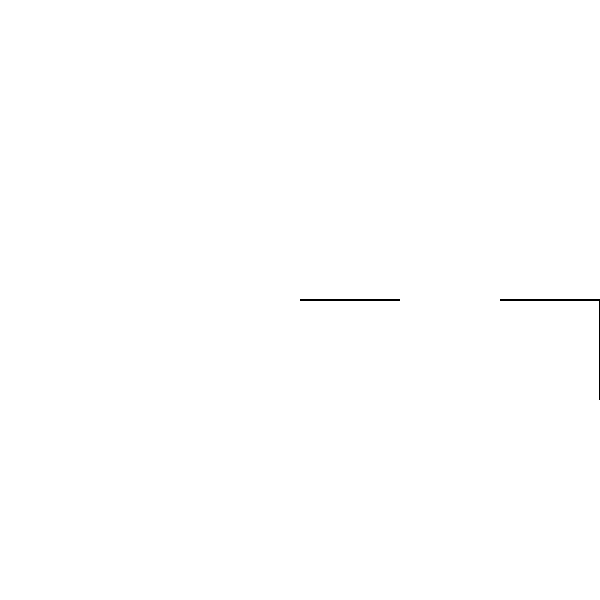

In [2]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 100

@svg begin           # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    forward(🐢,d) #hacia adelante
    penup(🐢) #levante la pluma
    forward(🐢,d)
    pendown(🐢) #baje la pluma
    forward(🐢,d)
    turn(🐢, 90) #para que se gire 90°
    forward(🐢,d)
end

**Ejercicio** Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia cada una con 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)

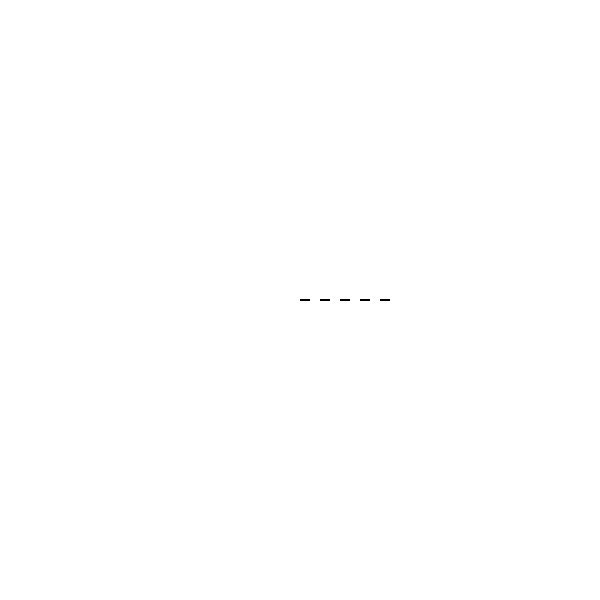

In [3]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 10

@svg begin  
    forward(🐢,d) #hacia adelante
    penup(🐢) #levante la pluma
    forward(🐢,d)
    pendown(🐢) #baje la pluma
    forward(🐢,d)
    penup(🐢) #levante la pluma
    forward(🐢,d)
    pendown(🐢) #baje la pluma
    forward(🐢,d)
     penup(🐢) #levante la pluma
    forward(🐢,d)
    pendown(🐢) #baje la pluma
    forward(🐢,d)
    penup(🐢) #levante la pluma
    forward(🐢,d)
    pendown(🐢) #baje la pluma
    forward(🐢,d)

end

**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo `for` o `while`.

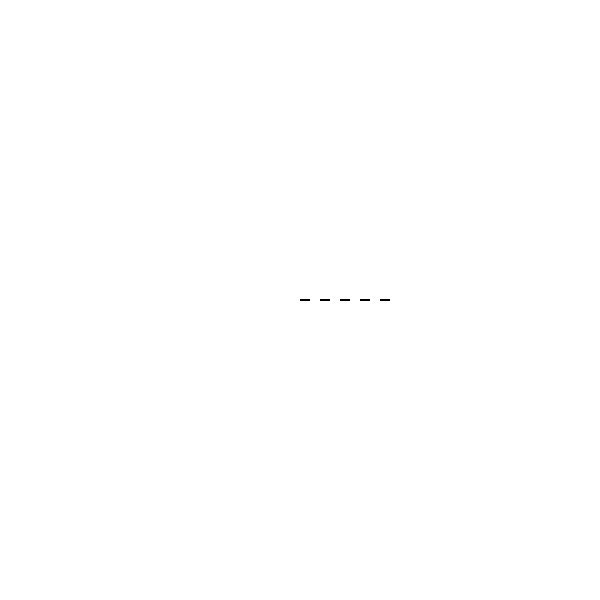

In [4]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 10

@svg begin   
    for x in 1:5
        forward(🐢,d) #hacia adelante
        penup(🐢) #levante la pluma
        forward(🐢,d)
        pendown(🐢) #baje la pluma
    end
end

**Ejercicio** Haz un programa que tome tres parámetros `n`, `d1` y `d2` (los cuales puedes definir como variables en la misma celda) y dibuje `n` líneas de longitud `d1` con una distancia de separación `d2` entre ellas utilizando un ciclo `for` o `while`.

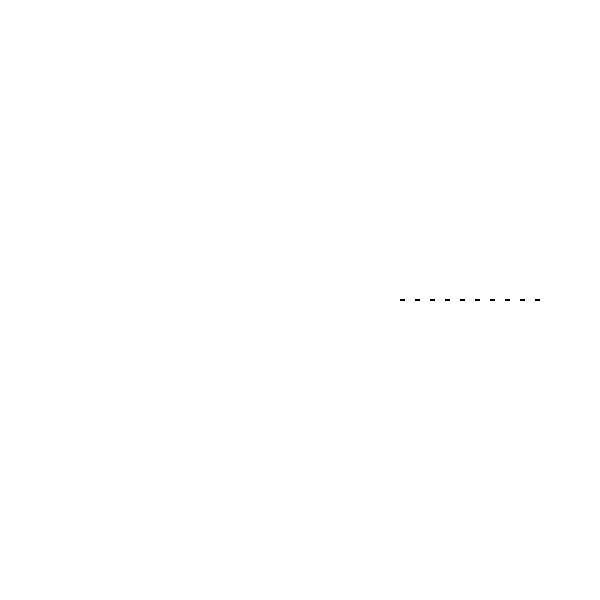

In [5]:
n=10
d1=5 
d2=10
@svg begin   
    for x in 1:n
        forward(🐢,d1) #hacia adelante una distancia d1
        penup(🐢) #levante la pluma
        forward(🐢,d2) # hacia adelante sin pintar una distancia d2
        pendown(🐢) #baje la pluma
    end
end

**Ejercicio** Haz un programa que dibuje un triángulo equilátero de lado `d`.

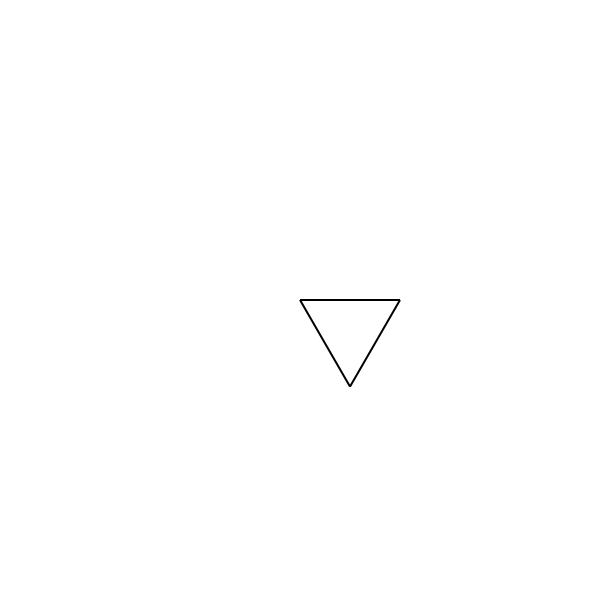

In [56]:
🐢 = Turtle()
d=100
n=3 #lados del tiángulo
@svg begin           
    forward(🐢,d) #ananza una distancia d
    turn(🐢, 360/n) #gira 360°/número de lados, ya que es un triángulo n=3 por lo que gira 120°
    forward(🐢,d) #vuelve a avanzar
    turn(🐢, 360/n) #vuelve a girar
    forward(🐢,d) #avanza una ultima distancia d
end

**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros `n` y `d` y dibuje un polígono regular de `n` lados de longitud `d` utilizando un ciclo `for` o `while`.

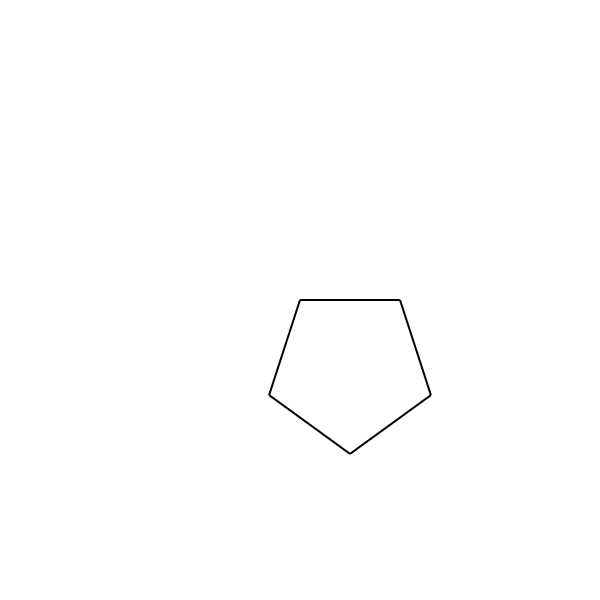

In [58]:
🐢 = Turtle() #Iniciamos en el centro del plano
n=5 #definimos el parámetro n= número de lados
d=100 #definimos d=tañaño de cada lado
@svg begin   
    for x in 1:n #utilizamos un ciclo for, de 1 a n
        forward(🐢,d) #hacia adelante una distancia d
        turn(🐢,360/n) #para hacer lados iguales usamos un ángulo= 360°/lados
    end
end

### Tortugas y fractales

Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga.

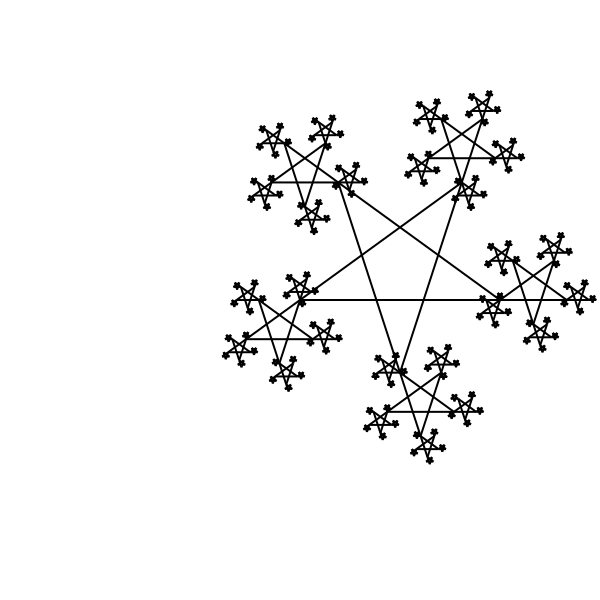

In [66]:
function estrella(tort,dist) #(valor de tortuga que va a dibujar, una distancia)
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.
d = 200
   
@svg estrella(🐢,d) 

**Ejercicio** Crea un fractal con un ciclo recursivo.

In [28]:
import Pkg; Pkg.add("Colors") #nos permite agregarle color a los fractales (color de la pluma)

   Resolving package versions...
    Updating `C:\Users\Windows 8.1 Pro\.julia\environments\v1.7\Project.toml`
  [5ae59095] + Colors v0.11.2
  No Changes to `C:\Users\Windows 8.1 Pro\.julia\environments\v1.7\Manifest.toml`


In [68]:
] add Colors #agregamos Color 

    Updating registry at `C:\Users\Windows 8.1 Pro\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Windows 8.1 Pro\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Windows 8.1 Pro\.julia\environments\v1.7\Manifest.toml`


In [155]:
using Colors #llamamos a Colors para poderlo udar 
#iniciamos definiendo dos funciones que se utilizaran posteriormente para armar el fractal
🐢 = Turtle() #turtle en el centro del plano
function cuadrado(🐢,d) #definimos nuestra primer función como "cuadrado"
#esta nos permite realizar un cuadrado de 4 lados iguales, los cuales pueden cambiar su tamaño dependiendo el valor d 
    for x in 1:4 #se usa un ciclo for de 1 a 4
        forward(🐢,d) #avanza una distancia d
        turn(🐢,90) #gira 90°
    end #se termina el ciclo
end #se termina la función


cuadrado (generic function with 1 method)

In [156]:
🐢 = Turtle() #turtle en el centro del plano
function poligono(🐢,d,n) #definimos la segunda función como "poligono" 
#esta función nos pérmite crear poligonos de n lados iguales
    for x in 1:n #usamos ciclo for de 1 a n (número de lados deceados)
        forward(🐢,d) #avanza una distancia d
        turn(🐢,360/n) #gira 360°/número de lados 
    end #se termina el ciclo
end #se termina la función

poligono (generic function with 2 methods)

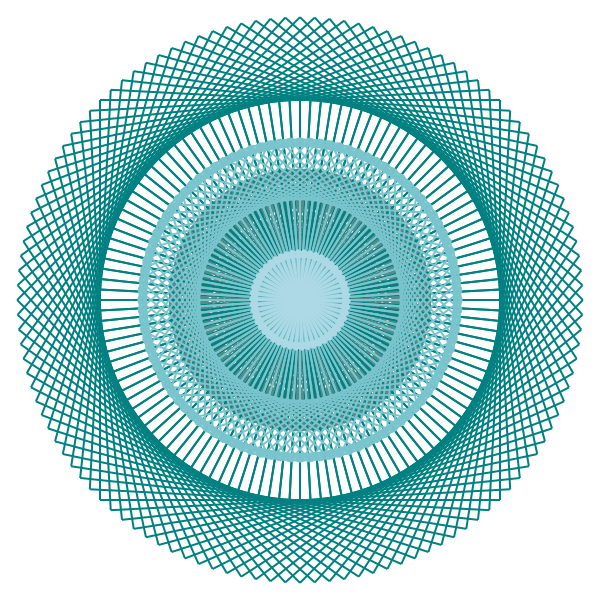

In [157]:
# Tu código comentado va aquí :D
@svg begin #iniciamos nuestras instrucciones
   🐢 = Turtle() #turtle en el centro del plano
    n=150 #definimos el valor de lados
    Pencolor(🐢,"darkslategray4") #definimos el color de la pluma (usando la biblioteca Colors previamente importada)
    for i in 1:n #utilizamos un ciclo for de 1 a n
        poligono(🐢,50,8) #utilizamos la función poligono,con una figura de 8 lados de tamaño 50 (cada lado)
        turn(🐢, 360/n) #pedimos que cada que termine de hacer el poligono gire 360°/número de lados
    end #terminamos este ciclo
    n=120 #definimos un nuevo valor de n
    Pencolor(🐢,"teal") #nuevo color de pluma
    for i in 1:n #iniciamos otro ciclo for
        cuadrado(🐢,200) #ahora utilizamos la función cuadrado, con un tamaño de lado de 200
        turn(🐢, 360/n)  #al finalizar cada cuadrado se vuelve a girar 360°/n
    end #terminamos este ciclo
    n=100 #nuevo n
    Pencolor(🐢,"cadetblue3") #nuevo color
    for i in 1:n #nuevo ciclo for
        poligono(🐢,100,5) #volvemos a usar la función poligono pero ahora se formara un pentagono de lado 100
        turn(🐢, 360/n) #al final cada pentágono se gira 360/n
    end #terminamos este ciclo
    n=50 #nuevo n
    Pencolor(🐢,"lightblue") #nuevo color
    for i in 1:n #ultimo ciclo for usado 
        poligono(🐢,50,3) #función poligo para hacer un triángulo
        turn(🐢, 360/n) #después de cada triángulo se gira 360°/n
    end #terminamos este ciclo
end #terminamos las instrucciones

**¡Concurso!** Cuando esta tarea se haya entregado, haremos un concurso grupal en el cual los fractales más creativos serán recompensados con décimas extra en el rubro de tareas, ¡así que echa a volar tu imaginación!

### Dato curioso

El _software_ de la biblioteca `ThinkJulia` que acabamos de utilizar está basado en la biblioteca [`turtle`](https://docs.python.org/3/library/turtle.html) de Python la cual, a su vez, está basada en el lenguaje de programación educativo [`Logo`](https://en.wikipedia.org/wiki/Logo_(programming_language)) creado en 1967.

## Recursos complementarios
* [Manual de ciclos en Julia](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops).